<div class="alert alert-block alert-info" align="center" style="padding: 10px;">    
    <h1><b><u>Ensemble Techniques And Its Types-4</u></b></h1>
</div>

**Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.**

**Dataset link:-**
    - https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

---
**Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
    numerical features if necessary.**

In [2]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(url)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---
**Q2. Split the dataset into a training set (70%) and a test set (30%).**

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---
**Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
    tree. Use the default values for other hyperparameters.**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

---
**Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.**


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.87
Recall: 0.84
F1 Score: 0.85


---
**Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
    disease risk. Visualise the feature importances using a bar chart.**
    

In [14]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
7,thalach,0.137195
2,cp,0.131526
11,ca,0.120405
9,oldpeak,0.103822
12,thal,0.094879
0,age,0.091332
3,trestbps,0.078480
4,chol,0.072735
8,exang,0.054774
10,slope,0.053945


In [15]:
# Select the top 5 important features
top_features = feature_importance_df.head(5)
top_features

,Feature,Importance
7,thalach,0.137195
2,cp,0.131526
11,ca,0.120405
9,oldpeak,0.103822
12,thal,0.094879


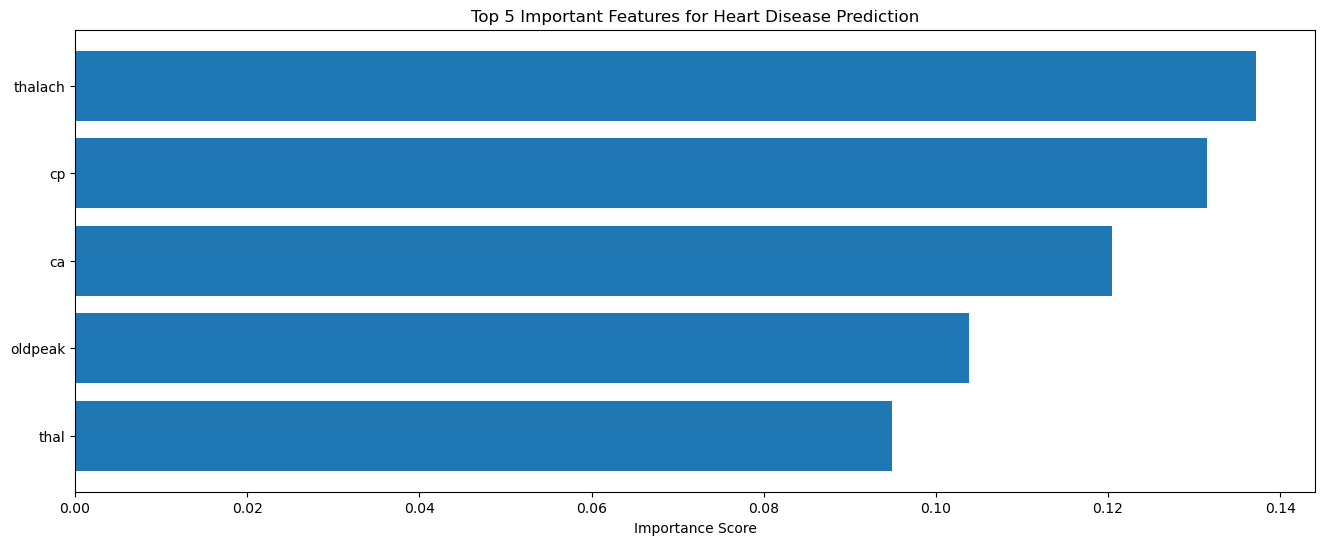

In [16]:
# Visualize feature importances using a bar chart
plt.figure(figsize=(16, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.gca().invert_yaxis()
plt.show()

---
**Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
    different values of the number of trees, maximum depth, minimum samples split, and minimum samples
    leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**
    

In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [18]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

---
**Q7. Report the best set of hyperparameters found by the search and the corresponding performance
    metrics. Compare the performance of the tuned model with the default model.**

In [19]:
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Best Hyperparameters:", best_params)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print(f"Tuned Model Precision: {precision_tuned:.2f}")
print(f"Tuned Model Recall: {recall_tuned:.2f}")
print(f"Tuned Model F1 Score: {f1_tuned:.2f}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Model Accuracy: 0.85
Tuned Model Precision: 0.84
Tuned Model Recall: 0.88
Tuned Model F1 Score: 0.86


---
**Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
    decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
    limitations of the model for predicting heart disease risk.**

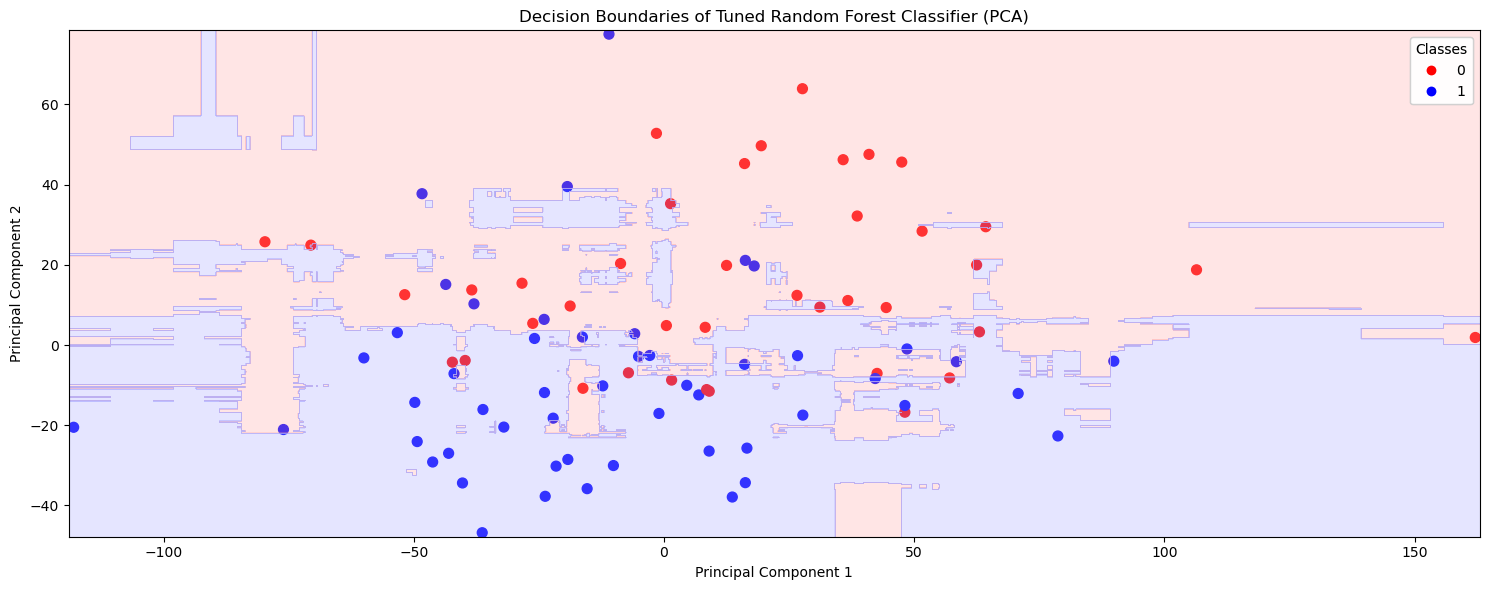

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Perform PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Perform PCA on the training and test data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a new Random Forest Classifier with the same hyperparameters
rf_classifier_pca = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

# Generate a mesh grid for PCA features
x_min_pca, x_max_pca = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min_pca, y_max_pca = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_pca, yy_pca = np.meshgrid(np.arange(x_min_pca, x_max_pca, 0.1), np.arange(y_min_pca, y_max_pca, 0.1))

# Predict on the mesh grid
Z_pca = rf_classifier_pca.predict(np.c_[xx_pca.ravel(), yy_pca.ravel()])
Z_pca = Z_pca.reshape(xx_pca.shape)

from matplotlib.colors import ListedColormap

# Create a colormap for the decision boundaries
cmap_decision = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Create a colormap for the scatter plot points
cmap_scatter = ListedColormap(['#FF0000', '#0000FF'])

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(15, 6))

# Scatter plot of the PCA-transformed data
scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_tuned, cmap=cmap_scatter, marker='o', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Plot decision boundaries in the PCA feature space
ax.contourf(xx_pca, yy_pca, Z_pca, alpha=0.3, cmap=cmap_decision)

# Create a legend
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.title("Decision Boundaries of Tuned Random Forest Classifier (PCA)")
plt.tight_layout()

# Show the plot
plt.show()

### Insights
* Model can identify clusters of data points associated with different levels of heart disease risk.
* Model can be used to predict heart disease risk for new individuals based on their characteristics.
* Model can take into account a variety of factors when making predictions, which could lead to more accurate predictions than simpler models.

### Limitations
* Model is only as good as the data it was trained on.
* Model cannot explain why it makes the predictions that it does.
* Model may not be able to accurately predict heart disease risk for individuals with rare or unique medical conditions or from populations that were not represented in the training data.
* Model should not be used to make medical decisions on its own.

### Overall
Model is a promising tool for predicting heart disease risk, but it is important to be aware of the limitations and use it carefully.
